In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading dictinary from file

In [2]:
uni_dict = np.load('example_dict.npy').item()

In [3]:
uni_dict

{'Boston': ['Northeastern University', 'Boston University'],
 'London': ['UCL',
  'Kings College',
  'Queen Mary University',
  'Royal Holloway University'],
 'Oxford': ['Oxford University']}

In [4]:
uni_dict.keys()

dict_keys(['Boston', 'London', 'Oxford'])

#### dictionary to dataframe

In [5]:
df_rows = []
for k,v in uni_dict.items():
    print('key', k)
    print('value',v)
    for vv in v:
        print('this will be a row: ',[k,vv])
        df_rows.append([k,vv])

key Boston
value ['Northeastern University', 'Boston University']
this will be a row:  ['Boston', 'Northeastern University']
this will be a row:  ['Boston', 'Boston University']
key London
value ['UCL', 'Kings College', 'Queen Mary University', 'Royal Holloway University']
this will be a row:  ['London', 'UCL']
this will be a row:  ['London', 'Kings College']
this will be a row:  ['London', 'Queen Mary University']
this will be a row:  ['London', 'Royal Holloway University']
key Oxford
value ['Oxford University']
this will be a row:  ['Oxford', 'Oxford University']


In [6]:
df_rows

[['Boston', 'Northeastern University'],
 ['Boston', 'Boston University'],
 ['London', 'UCL'],
 ['London', 'Kings College'],
 ['London', 'Queen Mary University'],
 ['London', 'Royal Holloway University'],
 ['Oxford', 'Oxford University']]

In [7]:
uni_df = pd.DataFrame(df_rows, columns=['city','university'])

In [8]:
uni_df

,city,university
0,Boston,Northeastern University
1,Boston,Boston University
2,London,UCL
3,London,Kings College
4,London,Queen Mary University
5,London,Royal Holloway University
6,Oxford,Oxford University


#### apply function to column

In [9]:
x = uni_df['university'].iloc[0]
x

'Northeastern University'

In [10]:
x.split(' ')[0]

'Northeastern'

In [11]:
uni_df['university'].apply(lambda x: x.split(' ')[0])

0    Northeastern
1          Boston
2             UCL
3           Kings
4           Queen
5           Royal
6          Oxford
Name: university, dtype: object

In [12]:
x = uni_df['university'].iloc[5]
x

'Royal Holloway University'

In [13]:
x.replace(' University','')

'Royal Holloway'

In [14]:
uni_df['university'].apply(lambda x: x.replace(' University',''))

0      Northeastern
1            Boston
2               UCL
3     Kings College
4        Queen Mary
5    Royal Holloway
6            Oxford
Name: university, dtype: object

In [15]:
uni_df['univeristy_name'] = uni_df['university'].apply(lambda x: x.replace(' University',''))
uni_df

,city,university,univeristy_name
0,Boston,Northeastern University,Northeastern
1,Boston,Boston University,Boston
2,London,UCL,UCL
3,London,Kings College,Kings College
4,London,Queen Mary University,Queen Mary
5,London,Royal Holloway University,Royal Holloway
6,Oxford,Oxford University,Oxford


#### apply function to multiple columns

In [16]:
uni_df.apply(lambda x: x.city + '_' + x.university, axis=1)

0      Boston_Northeastern University
1            Boston_Boston University
2                          London_UCL
3                London_Kings College
4        London_Queen Mary University
5    London_Royal Holloway University
6            Oxford_Oxford University
dtype: object

In [17]:
uni_df['city_plus_uni'] = uni_df.apply(lambda x: x.city + '_' + x.university, axis=1)
uni_df

,city,university,univeristy_name,city_plus_uni
0,Boston,Northeastern University,Northeastern,Boston_Northeastern University
1,Boston,Boston University,Boston,Boston_Boston University
2,London,UCL,UCL,London_UCL
3,London,Kings College,Kings College,London_Kings College
4,London,Queen Mary University,Queen Mary,London_Queen Mary University
5,London,Royal Holloway University,Royal Holloway,London_Royal Holloway University
6,Oxford,Oxford University,Oxford,Oxford_Oxford University


#### merging 


In [18]:
df_x = uni_df[['city', 'university']].copy()
df_y = pd.DataFrame({'city':['London', 'Boston','New York'],
                    'country':['UK','USA','USA']})

In [19]:
df_x

,city,university
0,Boston,Northeastern University
1,Boston,Boston University
2,London,UCL
3,London,Kings College
4,London,Queen Mary University
5,London,Royal Holloway University
6,Oxford,Oxford University


In [20]:
df_y

,city,country
0,London,UK
1,Boston,USA
2,New York,USA


<img src="join.png">

In [21]:
pd.merge(df_x, df_y, how='inner')

,city,university,country
0,Boston,Northeastern University,USA
1,Boston,Boston University,USA
2,London,UCL,UK
3,London,Kings College,UK
4,London,Queen Mary University,UK
5,London,Royal Holloway University,UK


In [22]:
pd.merge(df_x, df_y, how='outer')

,city,university,country
0,Boston,Northeastern University,USA
1,Boston,Boston University,USA
2,London,UCL,UK
3,London,Kings College,UK
4,London,Queen Mary University,UK
5,London,Royal Holloway University,UK
6,Oxford,Oxford University,NaN
7,New York,NaN,USA


In [23]:
pd.merge(df_x, df_y, how='left')

,city,university,country
0,Boston,Northeastern University,USA
1,Boston,Boston University,USA
2,London,UCL,UK
3,London,Kings College,UK
4,London,Queen Mary University,UK
5,London,Royal Holloway University,UK
6,Oxford,Oxford University,NaN


In [24]:
pd.merge(df_x, df_y, how='right')

,city,university,country
0,Boston,Northeastern University,USA
1,Boston,Boston University,USA
2,London,UCL,UK
3,London,Kings College,UK
4,London,Queen Mary University,UK
5,London,Royal Holloway University,UK
6,New York,NaN,USA


In [25]:
df_y = pd.DataFrame({'city_name':['London', 'Boston','New York'],
                    'country':['UK','USA','USA']})

In [26]:
pd.merge(df_x, df_y, how='left')

MergeError: No common columns to perform merge on

In [27]:
uni_with_location = pd.merge(df_x, df_y, how='left', left_on='city', right_on='city_name')

In [28]:
uni_with_location

,city,university,city_name,country
0,Boston,Northeastern University,Boston,USA
1,Boston,Boston University,Boston,USA
2,London,UCL,London,UK
3,London,Kings College,London,UK
4,London,Queen Mary University,London,UK
5,London,Royal Holloway University,London,UK
6,Oxford,Oxford University,NaN,NaN


#### merging on multiple columns

In [29]:
gdp = pd.DataFrame({'city':['London','London','Boston','Boston','New York','New York'],
                    'year':[2017,2018,2017,2018,2017,2018],
                    'GDP':[1,2,3,4,5,6]})
scholarship = pd.DataFrame({'university':['Queen Mary University','Royal Holloway University','Boston University', 'Queen Mary University','Royal Holloway University','Boston University'],
                    'year':[2017,2017,2017,2018,2018,2018],
                    'scholarship_avg':[1,2,3,4,5,6]})

In [30]:
gdp

,GDP,city,year
0,1,London,2017
1,2,London,2018
2,3,Boston,2017
3,4,Boston,2018
4,5,New York,2017
5,6,New York,2018


In [31]:
scholarship

,scholarship_avg,university,year
0,1,Queen Mary University,2017
1,2,Royal Holloway University,2017
2,3,Boston University,2017
3,4,Queen Mary University,2018
4,5,Royal Holloway University,2018
5,6,Boston University,2018


In [32]:
uni_with_location

,city,university,city_name,country
0,Boston,Northeastern University,Boston,USA
1,Boston,Boston University,Boston,USA
2,London,UCL,London,UK
3,London,Kings College,London,UK
4,London,Queen Mary University,London,UK
5,London,Royal Holloway University,London,UK
6,Oxford,Oxford University,NaN,NaN


In [33]:
scholarship_with_city = pd.merge(scholarship, uni_with_location[['university','city']],
                                how='left')
scholarship_with_city

,scholarship_avg,university,year,city
0,1,Queen Mary University,2017,London
1,2,Royal Holloway University,2017,London
2,3,Boston University,2017,Boston
3,4,Queen Mary University,2018,London
4,5,Royal Holloway University,2018,London
5,6,Boston University,2018,Boston


In [34]:
scholarship_with_city_GDP = pd.merge(scholarship_with_city, gdp,
                                    how='left', on=['city','year'])
scholarship_with_city_GDP

,scholarship_avg,university,year,city,GDP
0,1,Queen Mary University,2017,London,1
1,2,Royal Holloway University,2017,London,1
2,3,Boston University,2017,Boston,3
3,4,Queen Mary University,2018,London,2
4,5,Royal Holloway University,2018,London,2
5,6,Boston University,2018,Boston,4


#### seaborn plots

In [35]:
import seaborn as sns
#https://seaborn.pydata.org/examples/index.html

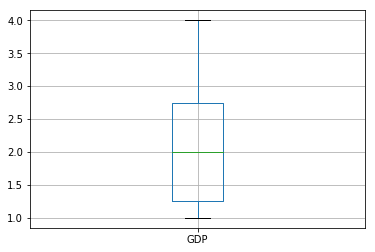

In [36]:
scholarship_with_city_GDP.boxplot('GDP')

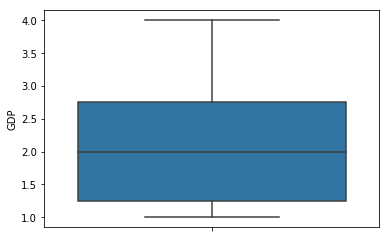

In [37]:
sns.boxplot(data=scholarship_with_city_GDP, x='GDP', orient='v')

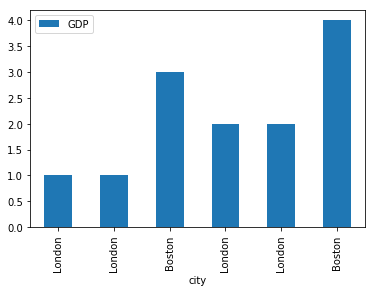

In [38]:
scholarship_with_city_GDP.plot.bar(x='city',y='GDP')

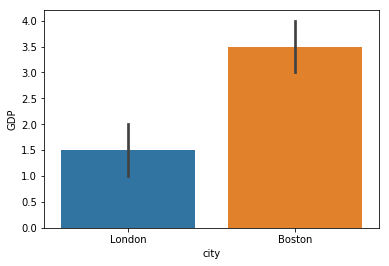

In [39]:
sns.barplot(data=scholarship_with_city_GDP, x='city', y='GDP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b527fef28>]], dtype=object)

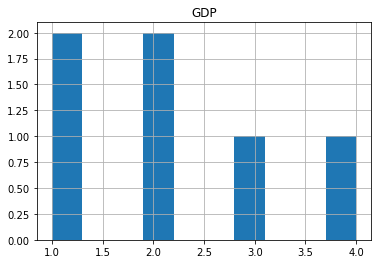

In [40]:
scholarship_with_city_GDP[['GDP']].hist()

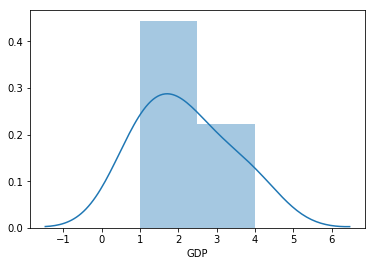

In [41]:
sns.distplot(scholarship_with_city_GDP['GDP'])

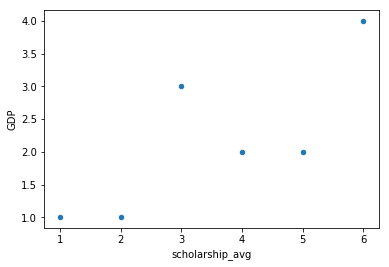

In [42]:
scholarship_with_city_GDP.plot.scatter(x='scholarship_avg',y='GDP')

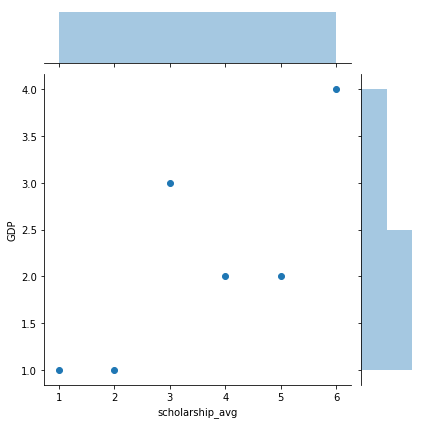

In [43]:
sns.jointplot(data=scholarship_with_city_GDP, x='scholarship_avg',y='GDP')

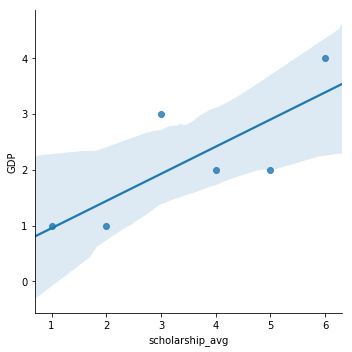

In [44]:
sns.lmplot(data=scholarship_with_city_GDP, x='scholarship_avg',y='GDP')

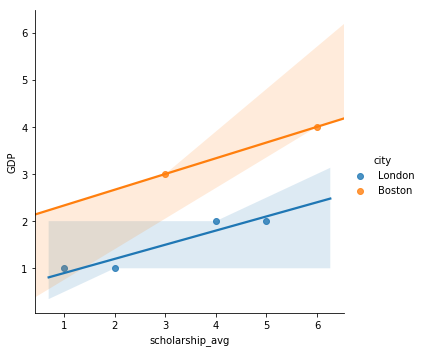

In [45]:
sns.lmplot(data=scholarship_with_city_GDP, x='scholarship_avg',y='GDP', hue='city')

In [189]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [193]:
p = figure( plot_width=600, plot_height=400)
p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['GDP'],
          color='lime', alpha=0.8, legend='London',
          marker='circle', size=15)
p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['GDP'],
          color='purple', alpha=0.8, legend='Boston',
         marker='circle', size=15)
p.legend.location = "top_left"
show(p)

In [194]:

p = figure( plot_width=600, plot_height=400)
p.title.text = 'Click on legend entries to hide the corresponding lines'

p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['GDP'],
          color='lime', alpha=0.8, legend='London',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['GDP'],
          color='purple', alpha=0.8, legend='Boston',
          muted_color='purple', muted_alpha=0.2,
         marker='circle', size=15)


p.legend.location = "top_left"
p.legend.click_policy="mute"#"hide"

show(p)

In [195]:

p = figure( plot_width=600, plot_height=400)
p.title.text = "Mouse over the dots"

l_df = scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']
source = ColumnDataSource(l_df)
p.scatter(x= 'scholarship_avg',
           y='GDP',
          color='lime', alpha=0.8, legend='London',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15,
         source = source)

hover = HoverTool(tooltips=[("uni", "@university"),
                            ('year', '@year')])
p.add_tools(hover)

b_df = scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']
source = ColumnDataSource(b_df)
p.scatter(x= 'scholarship_avg',
           y='GDP',
          color='purple', alpha=0.8, legend='Boston',
          muted_color='purple', muted_alpha=0.2,
         marker='circle', size=15,
         source = source)


p.add_tools(hover)
p.legend.location = "top_left"
p.legend.click_policy="mute"#"hide"

show(p)

### 1 - exercise

Load the zipcode_dict.npy file into a dictionary. <br>
Create a list (called df_rows) from the dictionary where each element looks like ['city','zipcode']. For each city there should be a row for all the corresponding zip codes.

In [46]:
zipdict = np.load('zipcode_dict.npy').item()

df_rows = []
for k,v in zipdict.items():
    for vv in v:
        df_rows.append([k,vv])



### 1 - check yourself

In [47]:
if len(df_rows) == 147:
    print('Your list is correct')
else:
    print('Your list is NOT correct')

Your list is correct


### 2 - exercise

- Create a dataframe from the df_rows list, where the columns are called landmark az zipcode <br>
- Create a new column in the dataframe called zip that contains the values from the zipcode column without the ',' and converted into integer type
- Drop the zipcode column

In [48]:
zipdf = pd.DataFrame(df_rows, columns=['landmark','zipcode'])

zipdf['zip'] = zipdf['zipcode'].apply(lambda x: int(x.strip(',')))

zipdf.drop('zipcode', axis=1, inplace=True)

### 2 - check yourself

In [49]:
if zipdf['zip'].dtype==int and len(zipdf) == 147:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 3 - exercise
Load the trip, station and weather csv-s into pandas dataframes <br>
Join them on the appropriate columns and create a final dataframe called merged_df where there is a row for each trip with the weather conditions for the corresponding day in the corresponding city (landmark)

In [50]:
trip = pd.read_csv('trip.csv')
station = pd.read_csv('station.csv')
weather = pd.read_csv('weather.csv')

station_z = pd.merge(station, zipdf, how='left', left_on='zip_code', right_on='zip')

trip_z = pd.merge(trip, station_z[['name', 'landmark','zip_code']],
                  how='left', left_on='Start Station', right_on='name')

merged_df = pd.merge(trip_z, weather, how='left', 
                  on=['date_to_join','landmark'])

### 3 - check yourself

In [51]:
if sorted(merged_df['Events'].value_counts().tolist()) == [498, 793, 10393, 11697, 120232]:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 4 - exercise

Create a new column in the merged_df called weekend where the value is True for Saturday and Sunday and False for the other days. If you want you can create helper column that contains the name of the day first

In [52]:
merged_df['weekend'] =  pd.to_datetime(merged_df['start_date']).dt.weekday_name.isin(['Saturday', 'Sunday'])

### 4 - check yourself

In [53]:
if sorted(merged_df['weekend'].value_counts().tolist()) == [23046, 121128]:
    print('The weekend column is correct')
else:
    print('The weekend column is NOT correct')

The weekend column is correct


### 5 - exercise

We would like to plot the number of trips taken by Customers/Subscribers by the different weather conditions. Let's start with the Max_Temperature_F! <br>
Create a dataframe where we can find for each possible values of the Max_Temperature_F, how many trips were taken by Subscirption Type and weekend. It will be the easiest to plot if the dataframe is in long format: for each temperature value there are 4 rows: weekend - Customer, weeken - Subscriber, weekday - Customer, weekday - Subscriber. Name the columns containing the number of trips to num_trips.

In [165]:
### Your code here
toplot = merged_df.groupby(['weekend','Subscription Type','Max_Temperature_F'
                                   ]).size().reset_index()
toplot.rename(columns = {0:'num_trips'}, inplace=True)

### 5 - check yourself

In [158]:
if len(toplot) == 165:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 6 - exercise
Use seaborn to lmplot to plot the relationship between the max temperature and the number of trips taken by Customers/Subscribers! Draw two separate plots for weekends and weekdays.

In [ ]:
import seaborn as sns

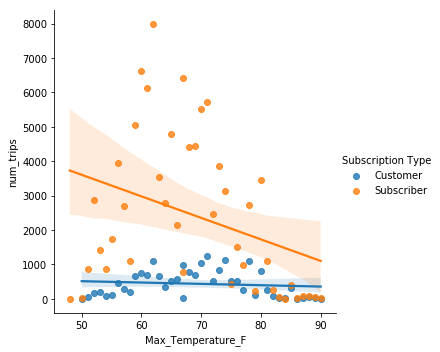

In [167]:
sns.lmplot(x='Max_Temperature_F', y='num_trips', hue='Subscription Type',
                truncate=True, data=toplot[toplot.weekend==False])

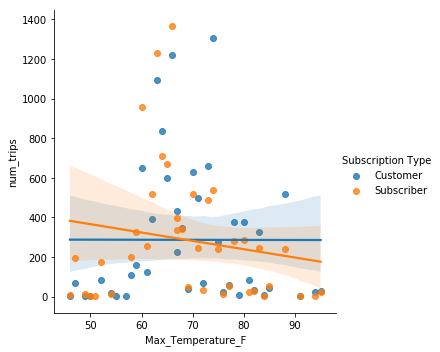

In [168]:
sns.lmplot(x='Max_Temperature_F', y='num_trips', hue='Subscription Type',
                truncate=True, data=toplot[toplot.weekend==True])

### 7 - exercise

Use a for loop to draw similar charts for all numeric weather conditions!

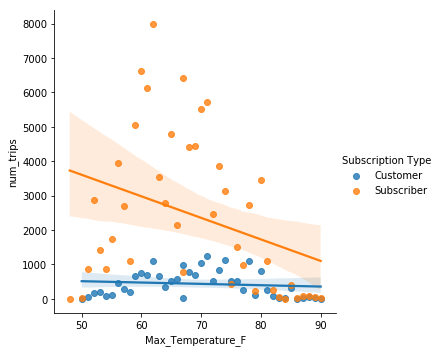

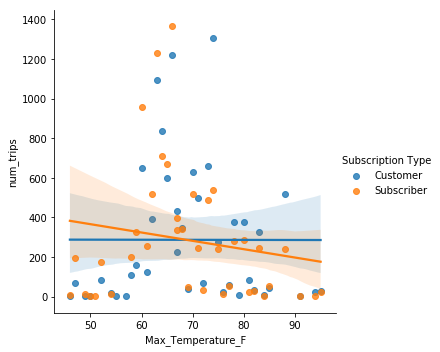

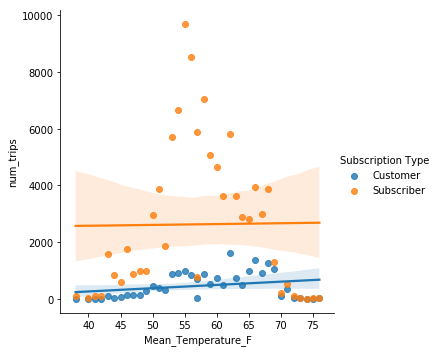

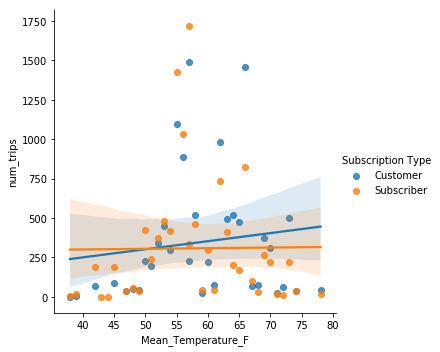

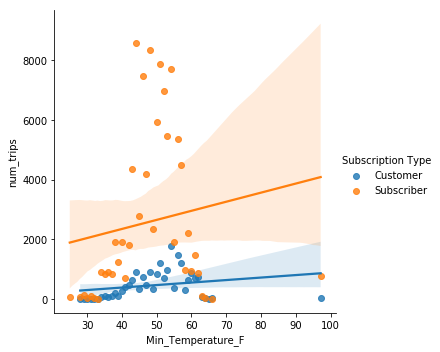

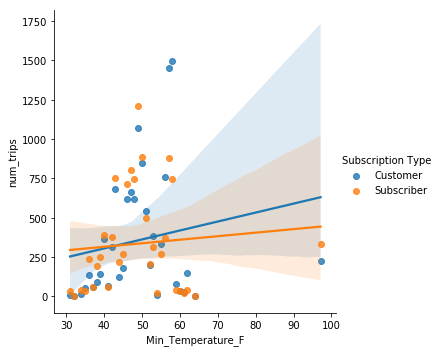

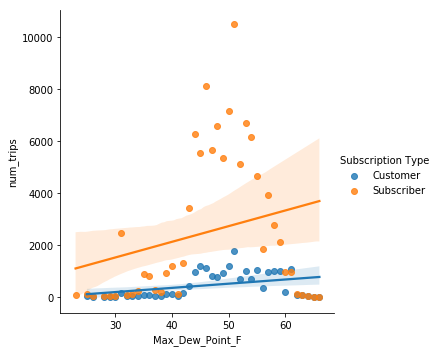

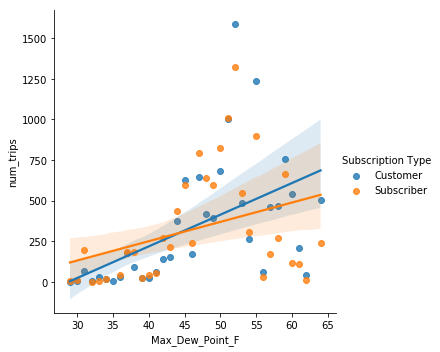

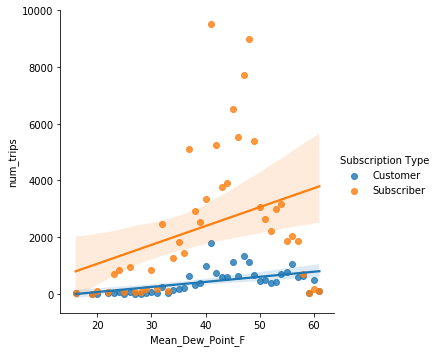

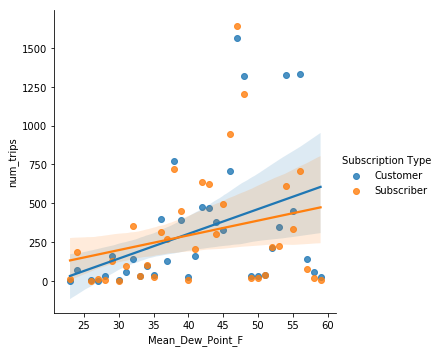

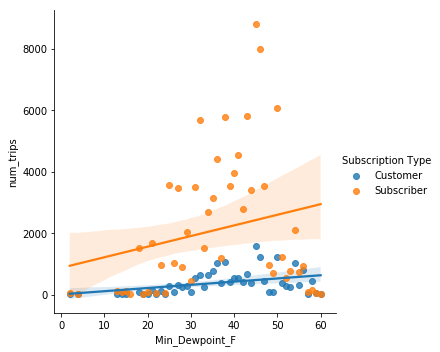

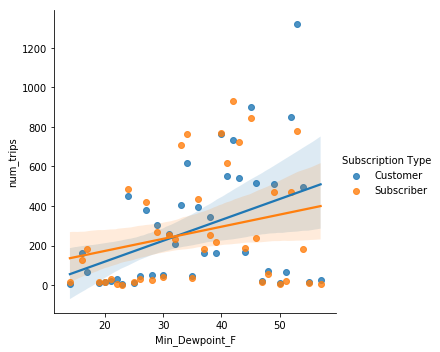

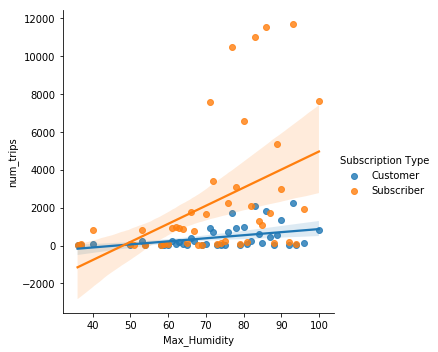

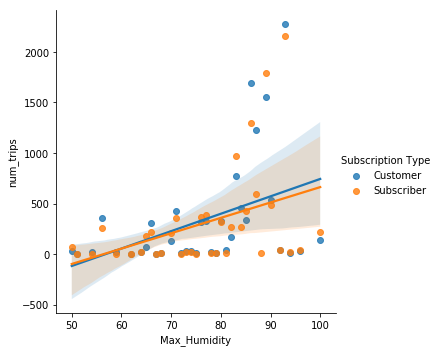

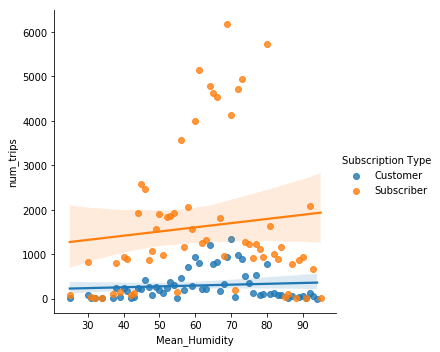

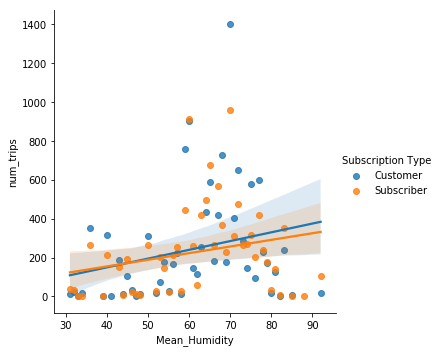

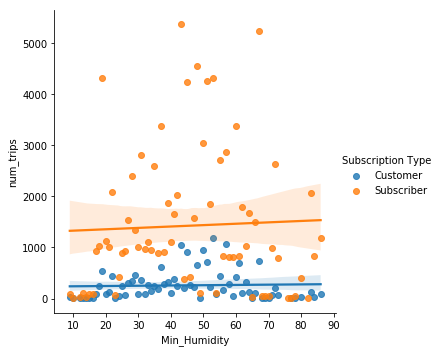

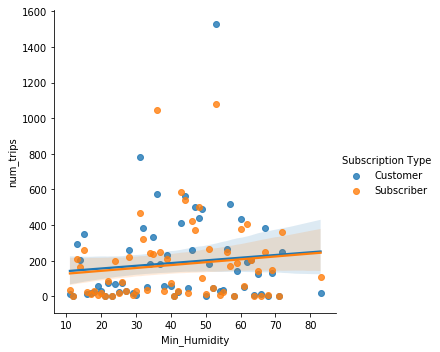

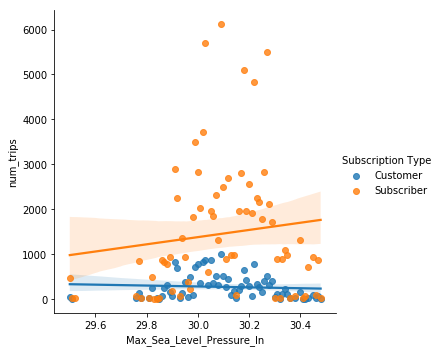

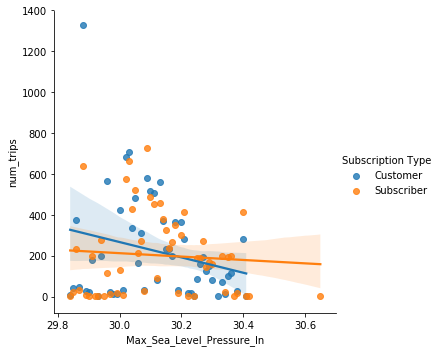

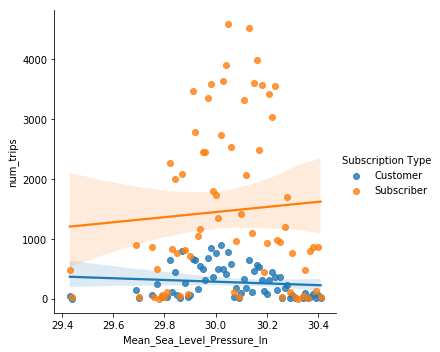

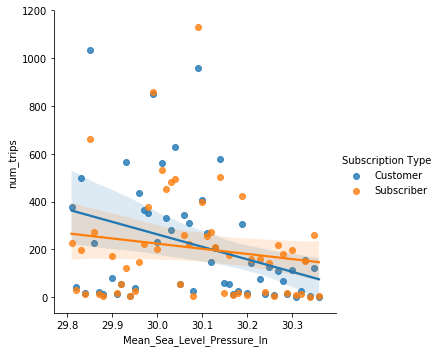

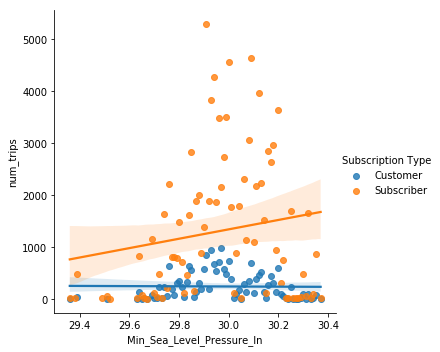

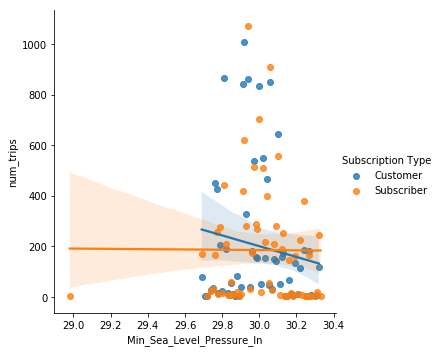

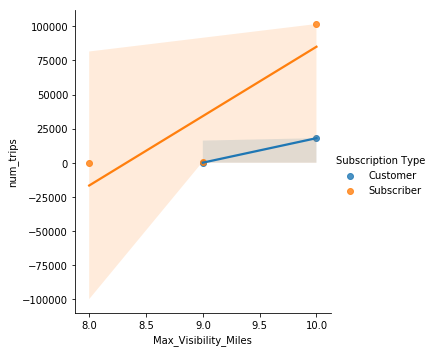

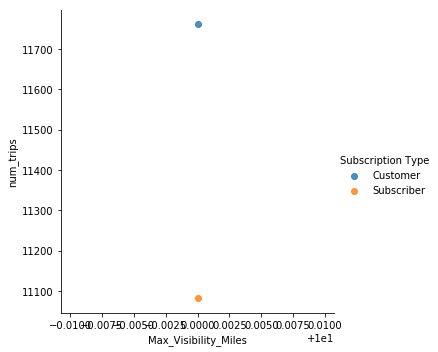

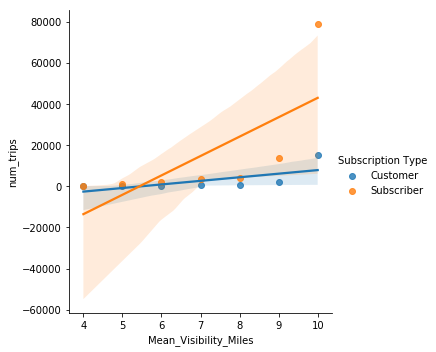

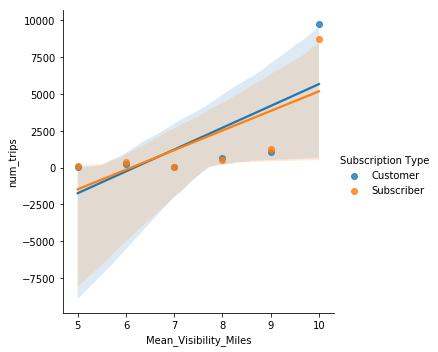

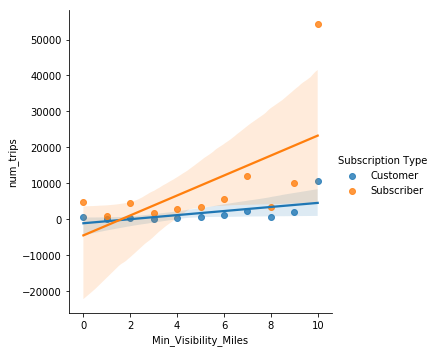

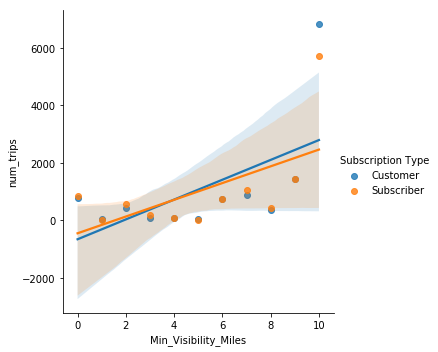

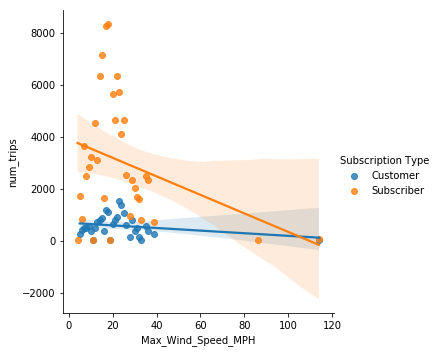

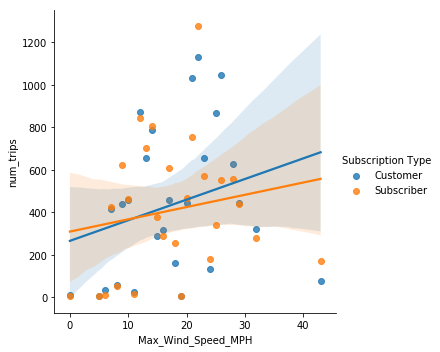

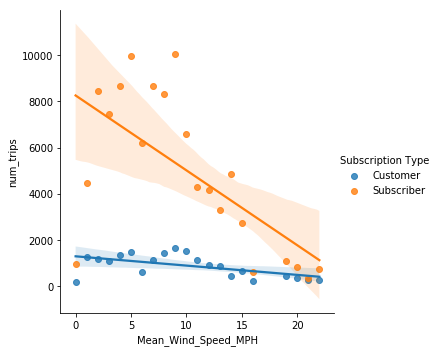

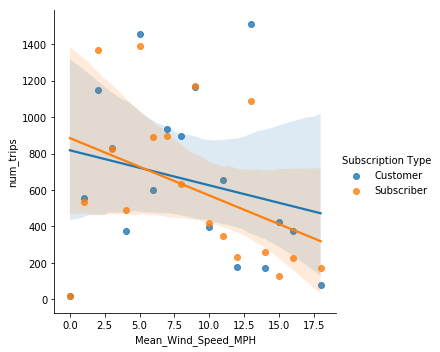

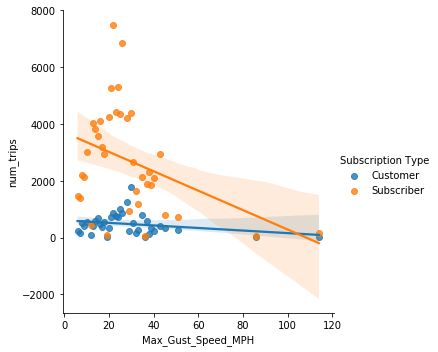

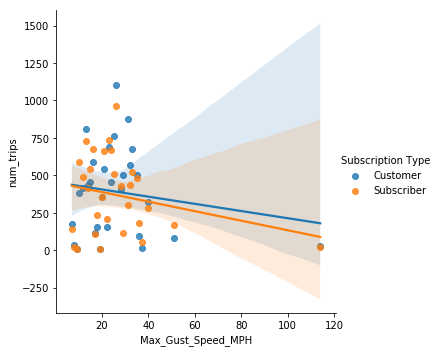

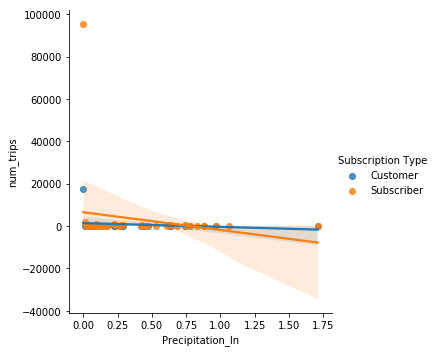

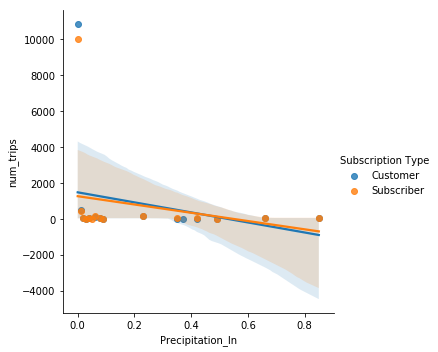

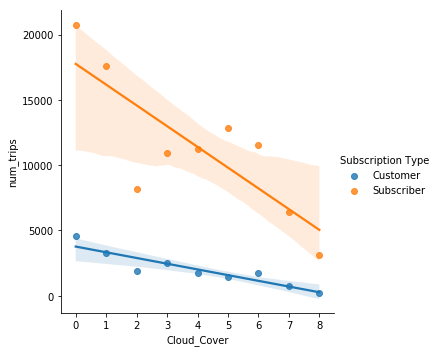

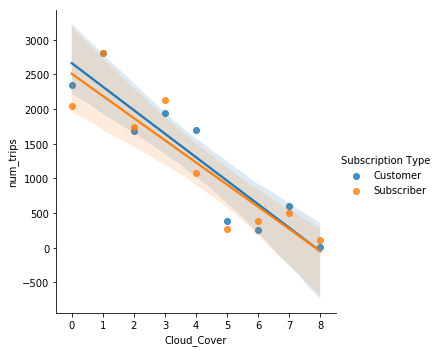

In [171]:
for c in ['Max_Temperature_F', 'Mean_Temperature_F', 'Min_Temperature_F',
       'Max_Dew_Point_F', 'Mean_Dew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In',
       'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In',
       'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles',
       'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH',
       'Precipitation_In', 'Cloud_Cover']:
    toplot = merged_df.groupby(['weekend','Subscription Type',c
                                   ]).size().reset_index()
    toplot.rename(columns = {0:'num_trips'}, inplace=True)
    sns.lmplot(x=c, y="num_trips", hue='Subscription Type',
                   truncate=True, data=toplot[toplot.weekend==False])
    plt.show()
    sns.lmplot(x=c, y="num_trips", hue='Subscription Type',
                   truncate=True, data=toplot[toplot.weekend==True])
    plt.show()


### 8 - exercise
Similarly as above, loop the numeric weather columns and draw a chart a weekend and a weekday chart for each variable. This time, calculate the customer/subscriber ratio and use the jointplot chart type to show it. You can draw a regression line on this type of chart as well. Check the documention to find the argument for it!

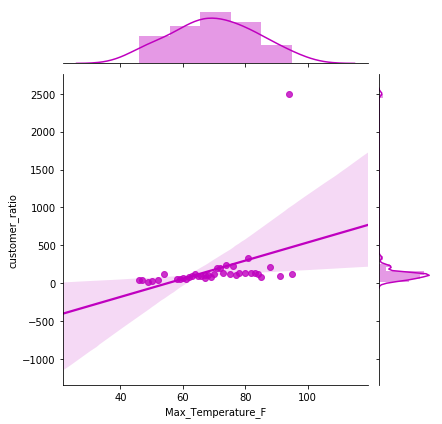

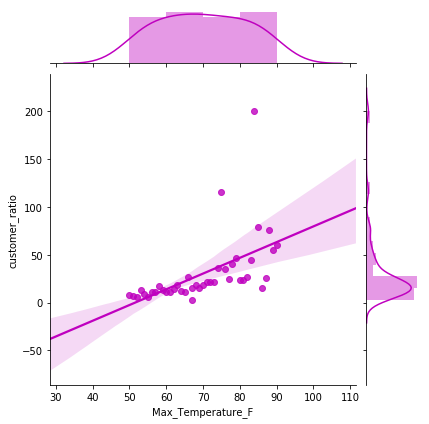

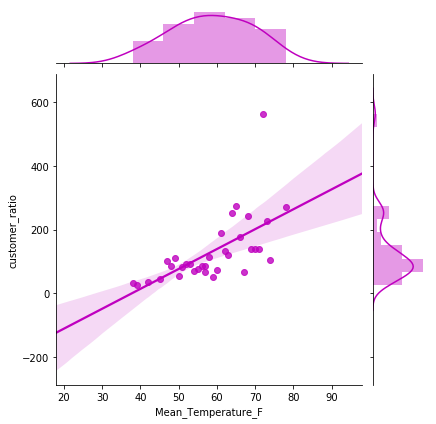

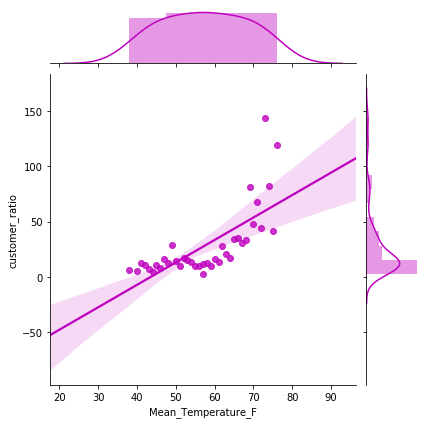

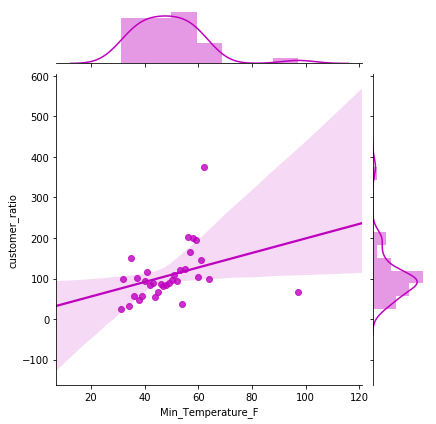

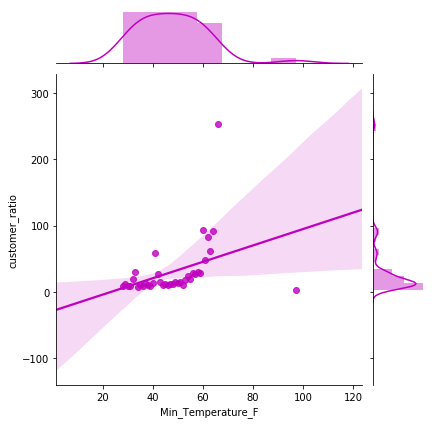

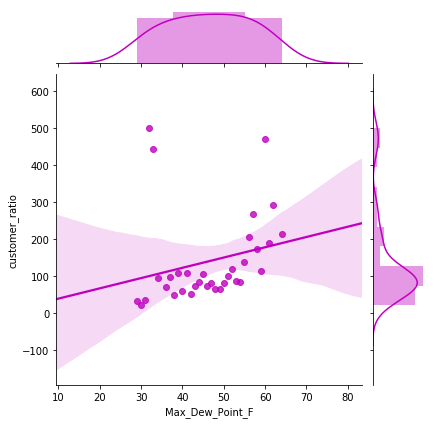

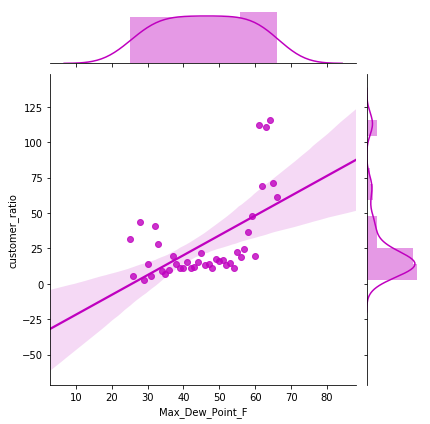

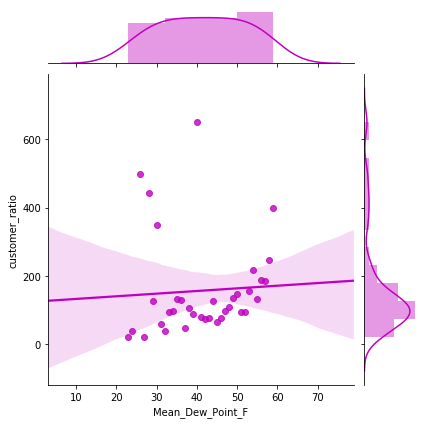

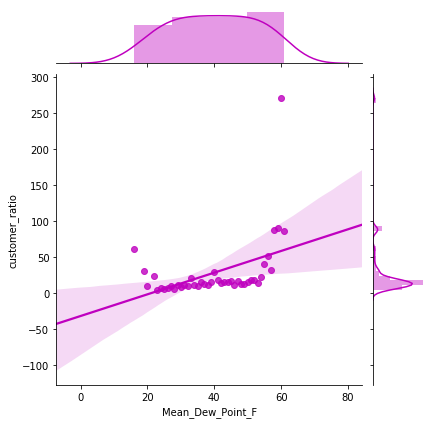

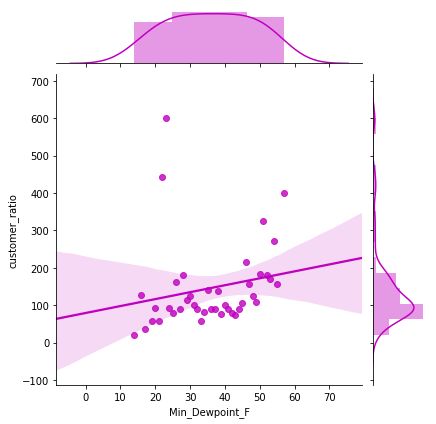

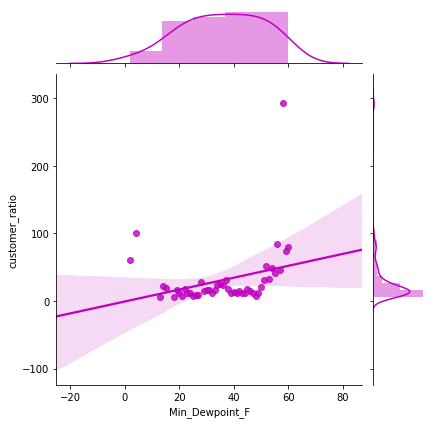

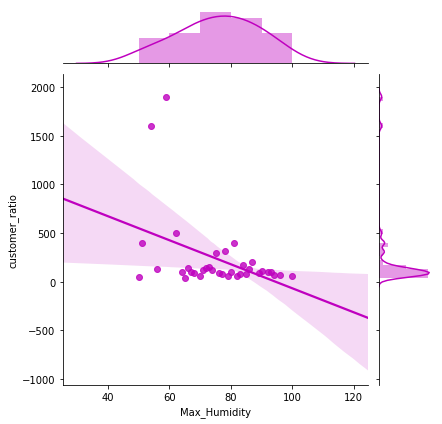

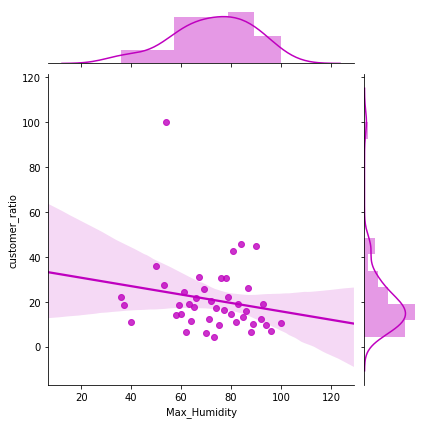

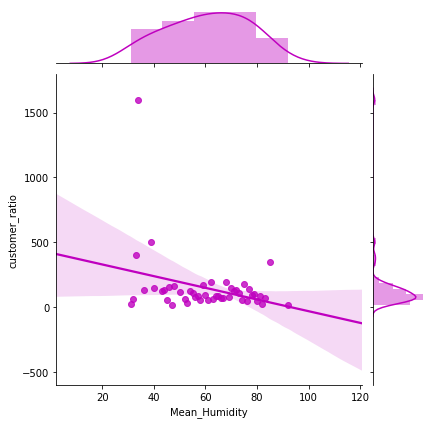

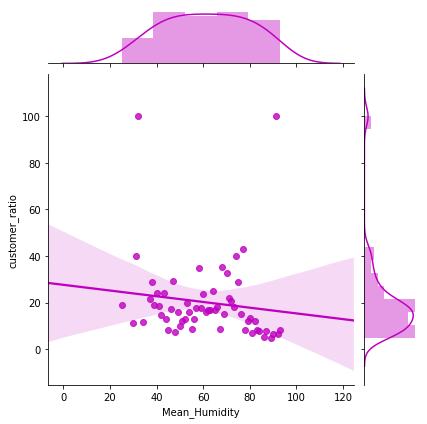

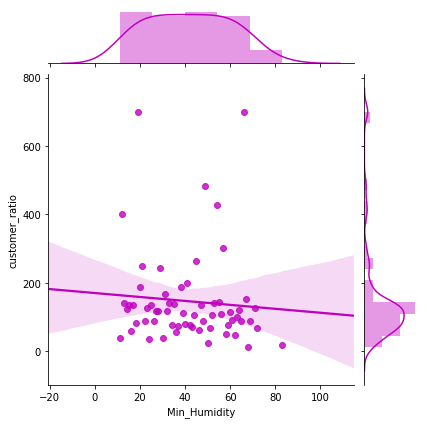

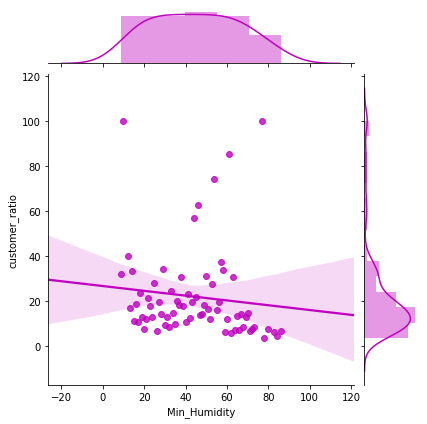

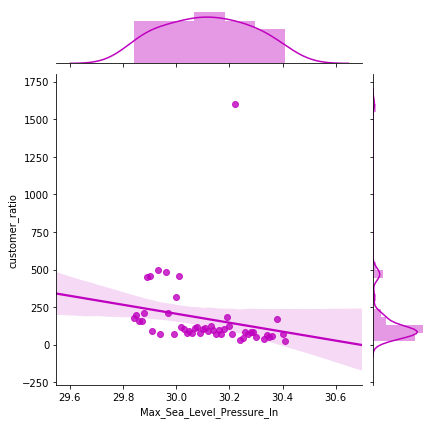

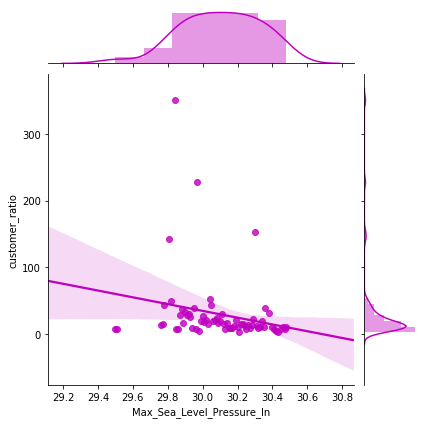

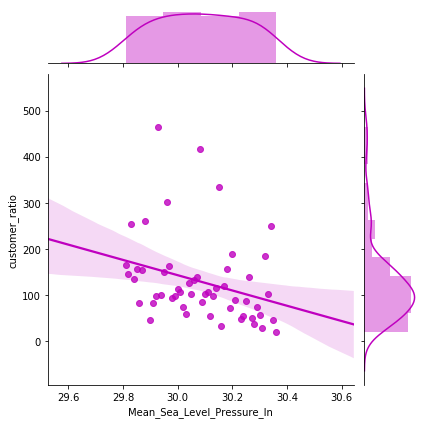

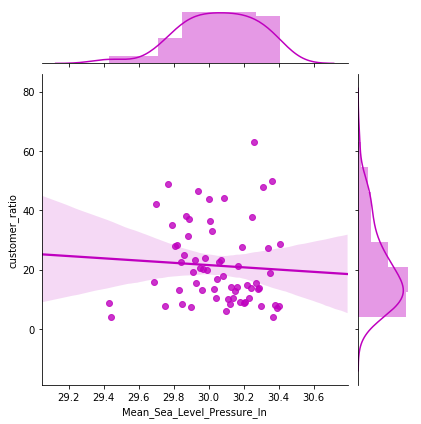

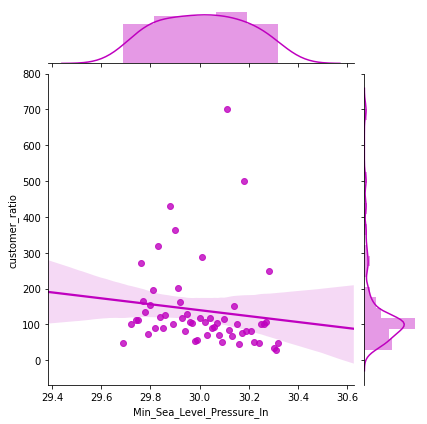

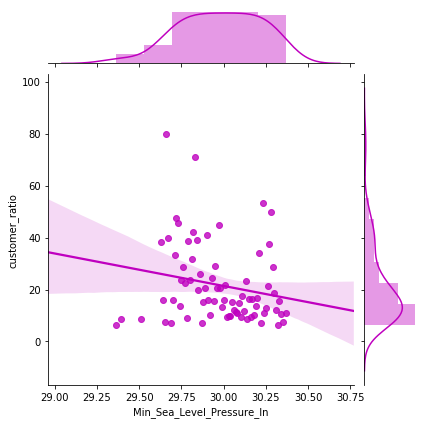

/home/esztersomos/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/esztersomos/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


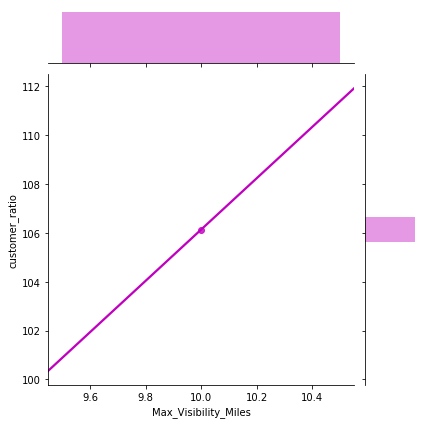

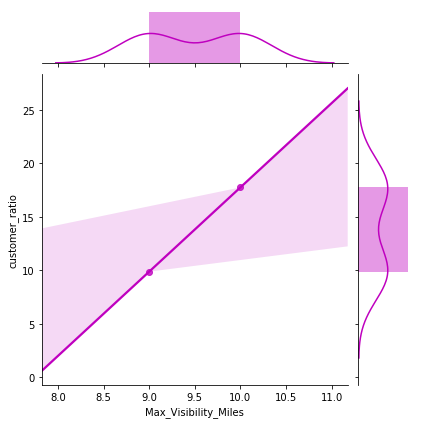

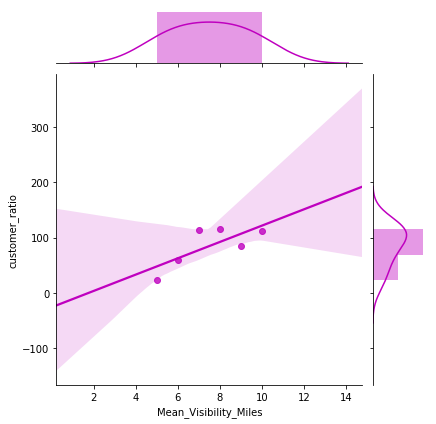

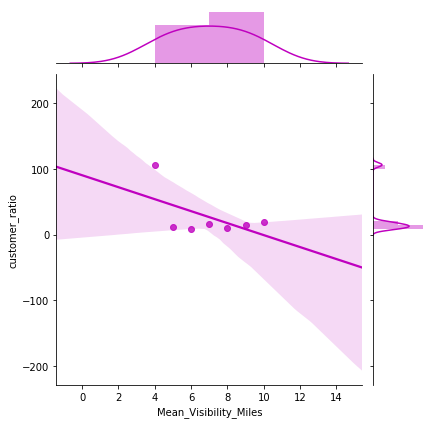

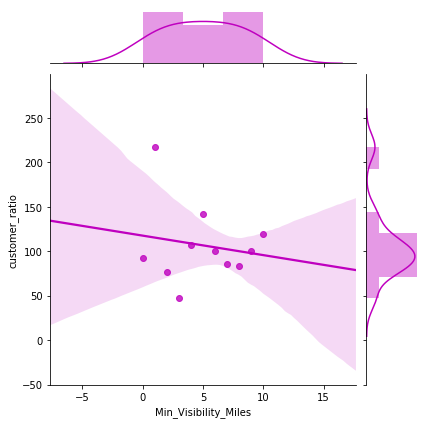

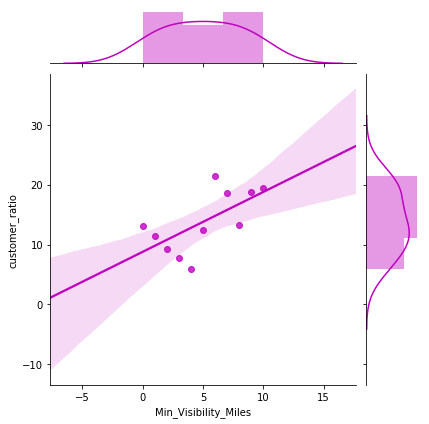

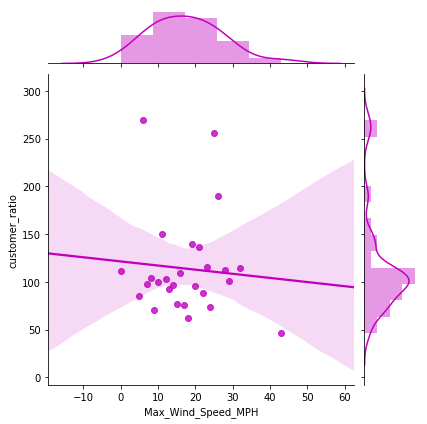

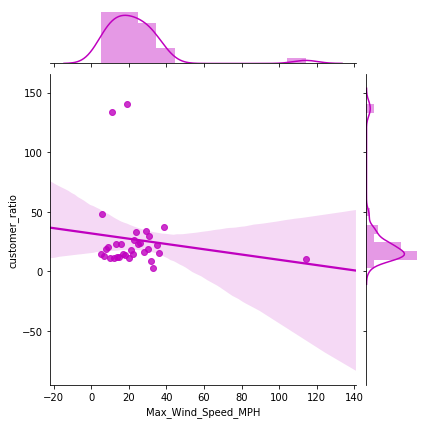

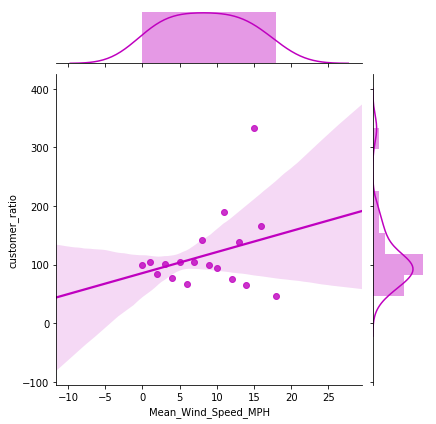

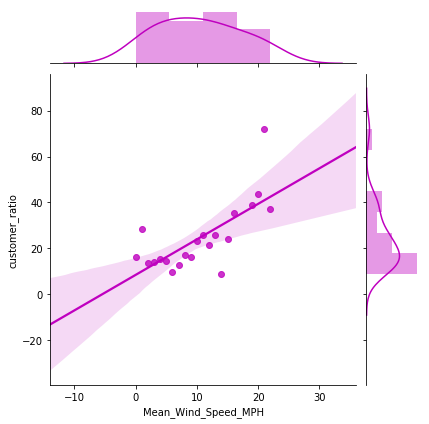

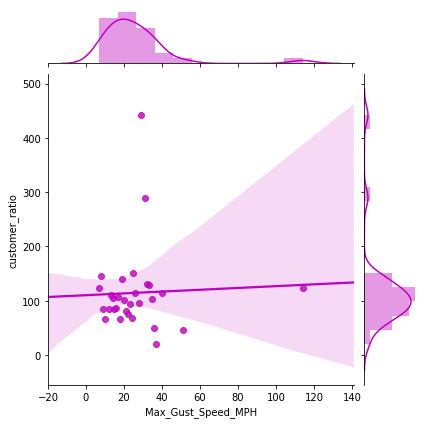

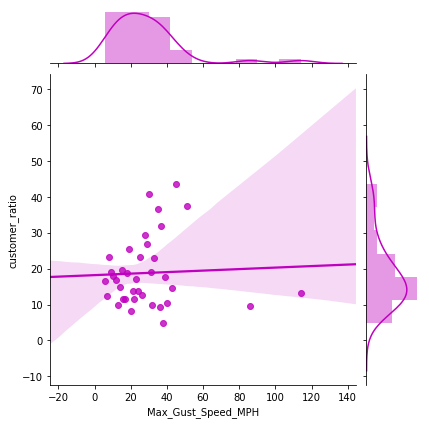

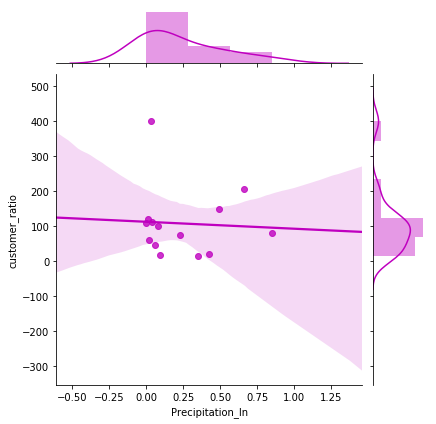

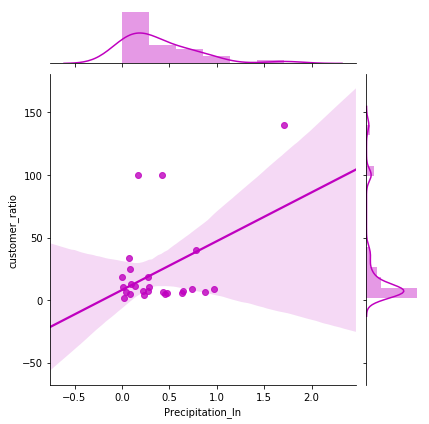

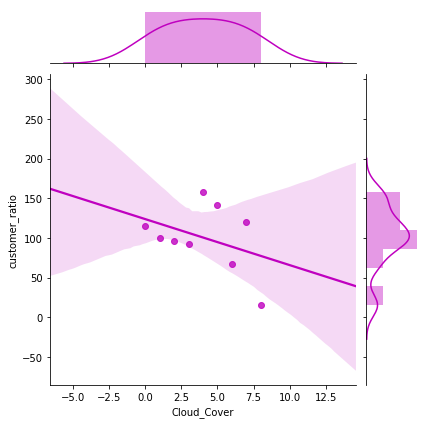

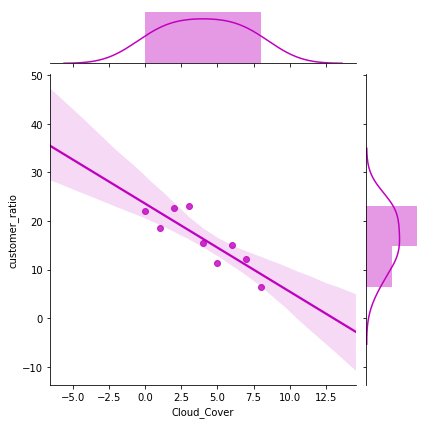

In [174]:
for c in ['Max_Temperature_F', 'Mean_Temperature_F', 'Min_Temperature_F',
       'Max_Dew_Point_F', 'Mean_Dew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In',
       'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In',
       'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles',
       'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH',
       'Precipitation_In', 'Cloud_Cover']:
    toplot = merged_df.groupby(['weekend','Subscription Type',c
                                   ]).size().reset_index()
    toplot.rename(columns = {0:'num_trips'}, inplace=True)
    subs_ratio = toplot[toplot.weekend==True].pivot(index=c, columns='Subscription Type', values='num_trips').reset_index()
    subs_ratio['customer_ratio'] = subs_ratio['Customer']*100/subs_ratio['Subscriber']
    
    sns.jointplot(c, "customer_ratio", data=subs_ratio, kind="reg",
                   color="m")
    plt.show()
    
    subs_ratio = toplot[toplot.weekend==False].pivot(index=c, columns='Subscription Type', values='num_trips').reset_index()
    subs_ratio['customer_ratio'] = subs_ratio['Customer']*100/subs_ratio['Subscriber']
    
    sns.jointplot(c, "customer_ratio", data=subs_ratio, kind="reg",
                   color="m")
    plt.show()
